In [21]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [22]:
# Load the training data into a Pandas DataFrame
df = pd.read_csv('/Users/prakharawasthi/Documents/CodePractice/Data Science/Data Science/archive (1)/employee_attrition_train.csv')

In [23]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
545,NaN,No,Travel_Frequently,1479.0,Research & Development,1.0,3,Life Sciences,1,384,...,1,80,1,6,6,1,6,5,1,4
373,41.0,Yes,Travel_Rarely,1085.0,Research & Development,2.0,4,Life Sciences,1,927,...,3,80,1,10,1,2,7,7,1,0
757,49.0,No,Travel_Rarely,1418.0,Research & Development,1.0,3,Technical Degree,1,887,...,2,80,1,7,2,3,4,2,0,2
572,46.0,No,Travel_Rarely,1485.0,Research & Development,18.0,3,Medical,1,550,...,3,80,1,19,5,2,10,7,0,8
721,32.0,No,Travel_Frequently,585.0,Research & Development,10.0,3,Life Sciences,1,1720,...,1,80,1,10,3,2,5,2,1,3


In [41]:
df.shape

(1029, 36)

In [42]:
df.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [43]:
df = df.dropna()

In [44]:
df.shape

(775, 36)

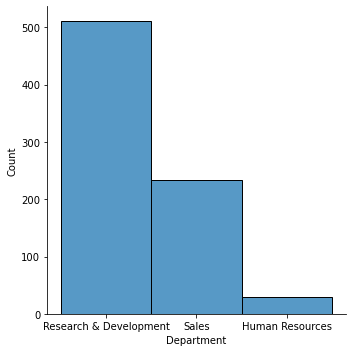

In [45]:
sns.displot(df['Department'])

In [46]:
le = LabelEncoder()
le.fit(df['Department'])
df['Dept_index'] = le.transform(df['Department'])

/var/folders/1r/vw6_b7gd695fxkyjvzpv8cph0000gn/T/ipykernel_1285/2261250694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dept_index'] = le.transform(df['Department'])


In [47]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept_index
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,80,1,32,1,2,5,4,1,3,1
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,80,2,7,0,3,3,2,0,1,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,80,0,1,3,3,1,0,1,0,2
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,80,0,18,4,3,8,6,4,0,1
5,33.0,Yes,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,...,80,0,15,2,4,7,6,7,7,1


In [48]:

# Select the columns that will be used as features
X = df[['Age', 'TotalWorkingYears','Dept_index']]

# Select the column that will be used as the target
y = df['MonthlyIncome']

In [49]:
# Create a k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
X.isnull().sum()

Age                  0
TotalWorkingYears    0
Dept_index           0
dtype: int64

In [51]:
y.isnull().sum()

0

In [52]:
# Fit the model to the training data
knn.fit(X, y)

KNeighborsClassifier()

In [53]:
# Define a new data point for which we want to find the 5 nearest neighbors
new_point = pd.DataFrame({'Age': [43], 'TotalWorkingYears': [11], 'Dept_index': [1]})

In [54]:
# Find the indices of the 5 nearest neighbors
indices = knn.kneighbors(new_point, return_distance=False)[0]

In [55]:
# Print the 5 nearest neighbors
print(f'The 5 nearest neighbors are:')
for i in indices:
    print(f' - {X.iloc[i]} ({y.iloc[i]})')

The 5 nearest neighbors are:
 - Age                  43.0
TotalWorkingYears    10.0
Dept_index            1.0
Name: 479, dtype: float64 (5679)
 - Age                  43.0
TotalWorkingYears    10.0
Dept_index            1.0
Name: 711, dtype: float64 (7510)
 - Age                  43.0
TotalWorkingYears    12.0
Dept_index            1.0
Name: 196, dtype: float64 (5562)
 - Age                  42.0
TotalWorkingYears    11.0
Dept_index            1.0
Name: 823, dtype: float64 (5265)
 - Age                  43.0
TotalWorkingYears    10.0
Dept_index            2.0
Name: 66, dtype: float64 (7847)
